<a href="https://colab.research.google.com/github/AmirHPartovi/MNIST/blob/master/MNIST_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Create Model with ANN for MNIST**

# Import Tensorflow and keras models, layers, dataset

In [50]:
import tensorflow as tf
print(tf.__version__)
import tensorflow.keras as keras

2.18.0


# Load Data


In [51]:
# Load Data
mnist = keras.datasets.mnist
(x_train , y_train), (x_test , y_test) = mnist.load_data()

# Train set & Test set


In [52]:
# Train set & Test set
x_train , x_test = x_train / 255.0 , x_test / 255.0
print("X_train Shape",x_train.shape)

X_train Shape (60000, 28, 28)


# Build Model


In [53]:
# Build Model
model = keras.models.Sequential([
    keras.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax')

])

#Compile The Model

In [54]:
# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model

In [55]:
# Train the Model
fit = model.fit(x_train, y_train,
                validation_data=(x_test , y_test),
                epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8622 - loss: 0.4750 - val_accuracy: 0.9573 - val_loss: 0.1384
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9567 - loss: 0.1478 - val_accuracy: 0.9714 - val_loss: 0.0975
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9694 - loss: 0.1083 - val_accuracy: 0.9732 - val_loss: 0.0856
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9727 - loss: 0.0893 - val_accuracy: 0.9749 - val_loss: 0.0806
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9763 - loss: 0.0738 - val_accuracy: 0.9761 - val_loss: 0.0708
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9799 - loss: 0.0615 - val_accuracy: 0.9781 - val_loss: 0.0720
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9819 - loss: 0.0570 - val_accuracy: 0.9784 - val_loss: 0.0749
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9824 - loss: 0.052

#Loss Per Iteration

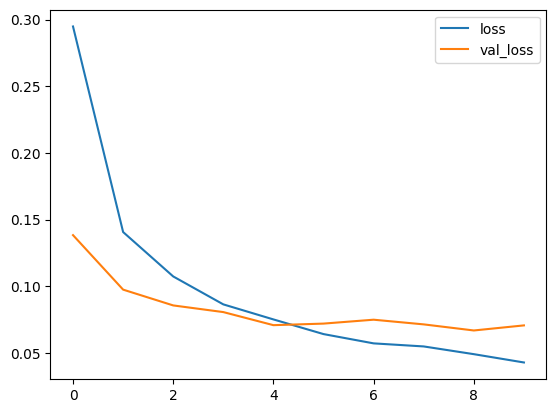

In [56]:
# Plot Los per Iteraton
import matplotlib.pyplot as plt
plt.plot(fit.history['loss'],label='loss')
plt.plot(fit.history['val_loss'],label='val_loss')
plt.legend()

#Accuracy per Iteration



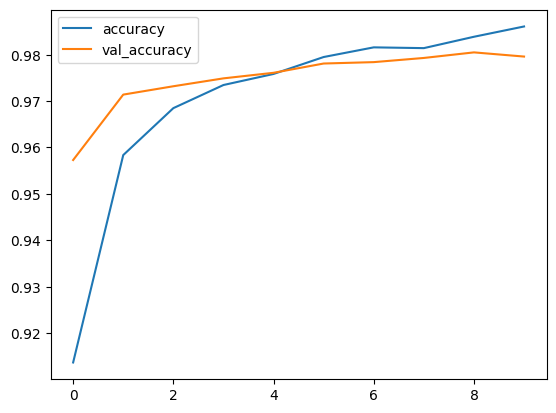

In [57]:
# Plot Accuray per Iteration
plt.plot(fit.history['accuracy'],label='accuracy')
plt.plot(fit.history['val_accuracy'],label='val_accuracy')
plt.legend()

# Evaluatate the Model

In [58]:
# Evaluatate the Model
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9778 - loss: 0.0814


[0.07066462188959122, 0.9796000123023987]

#Confussing Matrix

In [59]:
# Plot Confussing Matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
cm = confusion_matrix(y_test,y_pred)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):

    """
    Showing Confusing Matrix Plot
    & Normalization is optional `Normalize =True`
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Confusion matrix, without normalization
[[ 971    1    1    1    0    1    0    1    2    2]
 [   0 1124    2    2    0    0    2    0    5    0]
 [   3    2 1011    4    2    0    2    6    2    0]
 [   0    0    4  990    0    6    0    4    4    2]
 [   1    0    4    0  958    0    8    1    1    9]
 [   3    0    0    8    0  877    2    0    2    0]
 [   5    2    0    1    3    4  942    0    1    0]
 [   0    3   10    1    0    0    0 1010    1    3]
 [   6    1    2    4    5    9    3    3  936    5]
 [   0    3    0    9    8    4    0    7    1  977]]


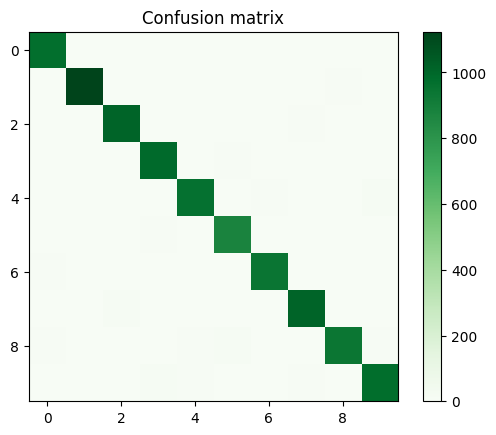

In [60]:
class_names = [str(i) for i in range(10)]
plot_confusion_matrix(cm, classes=class_names)

# Misclassified example

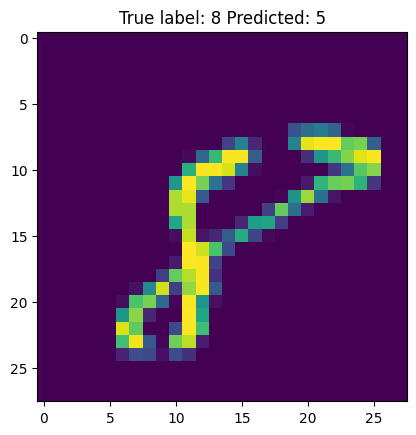

In [61]:
misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i])
plt.title("True label: %s Predicted: %s" % (y_test[i], y_pred[i]));

#**Some Changing Apply to Model (OVERFITTING EXAMPLE)**
***add more dense layer and increase epochs number***

# Build Model To Show How Overfitting appears

ADD 4 MORE FULLY CONNECT LAYERS (DENSE LAYERS) AND REMOVE DROPOUT LAYER

In [65]:
# Build Model
model = keras.models.Sequential([
    keras.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(128,activation='relu'),## Add more Fully Connected Layer and remove DROPOUT LAYER
    keras.layers.Dense(128,activation='relu'),
    # keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax')

])

# Compile Model (OVERFITTING)

In [66]:
# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train Model (OVERFITTING)
INCREASE EPOCH NUMBERS FROM 10 to 20

In [67]:
# Train the Model
fit = model.fit(x_train, y_train,
                validation_data=(x_test , y_test),
                epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8656 - loss: 0.4356 - val_accuracy: 0.9580 - val_loss: 0.1413
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9653 - loss: 0.1170 - val_accuracy: 0.9639 - val_loss: 0.1194
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9757 - loss: 0.0823 - val_accuracy: 0.9707 - val_loss: 0.0982
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9795 - loss: 0.0670 - val_accuracy: 0.9721 - val_loss: 0.0993
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9845 - loss: 0.0533 - val_accuracy: 0.9756 - val_loss: 0.0907
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9857 - loss: 0.0485 - val_accuracy: 0.9783 - val_loss: 0.0819
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9883 - loss: 0.0382 - val_accuracy: 0.9754 - val_loss: 0.0908
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9899 - loss: 0.0328

#Loss Per Iteration (OVERFITTING)

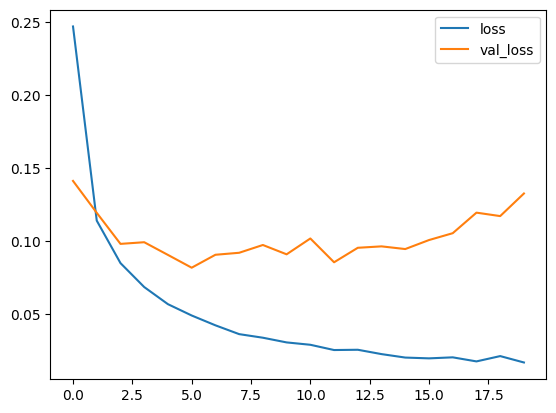

In [68]:
# Plot Los per Iteraton
import matplotlib.pyplot as plt
plt.plot(fit.history['loss'],label='loss')
plt.plot(fit.history['val_loss'],label='val_loss')
plt.legend()

#Accuracy per Iteration (OVERFITTING)



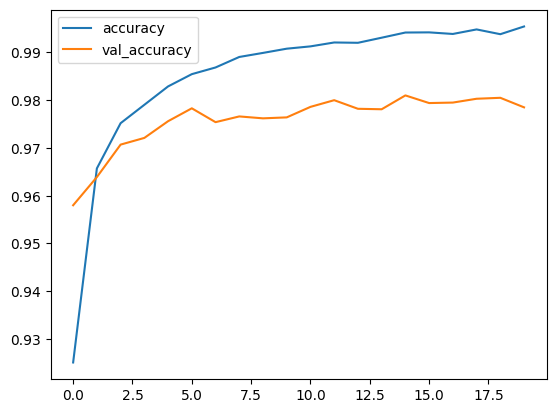

In [69]:
# Plot Accuray per Iteration
plt.plot(fit.history['accuracy'],label='accuracy')
plt.plot(fit.history['val_accuracy'],label='val_accuracy')
plt.legend()

# Evaluatate the Model (OVERFITTING)
**RESULT WORST THAN PREVIOUS MODEL( SIMPLER MODEL )**

In [71]:
# Evaluatate the Model
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9752 - loss: 0.1505


[0.1326594203710556, 0.9785000085830688]

#Confussing Matrix (OVERFITTING)

In [72]:
# Plot Confussing Matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
cm = confusion_matrix(y_test,y_pred)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):

    """
    Showing Confusing Matrix Plot
    & Normalization is optional `Normalize =True`
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Confusion matrix, without normalization
[[ 968    1    1    0    0    2    0    1    7    0]
 [   0 1127    0    0    0    1    1    1    5    0]
 [   1    2 1004    5    2    0    1    7   10    0]
 [   0    1    3  983    0    0    0    6    8    9]
 [   1    0    1    0  963    0    1    3    0   13]
 [   2    0    0   10    0  859    3    1    6   11]
 [   6    2    2    0    6    7  925    0   10    0]
 [   1    5    5    2    2    0    0 1004    1    8]
 [   0    0    2    2    0    2    0    0  963    5]
 [   1    2    1    1    7    0    0    5    3  989]]


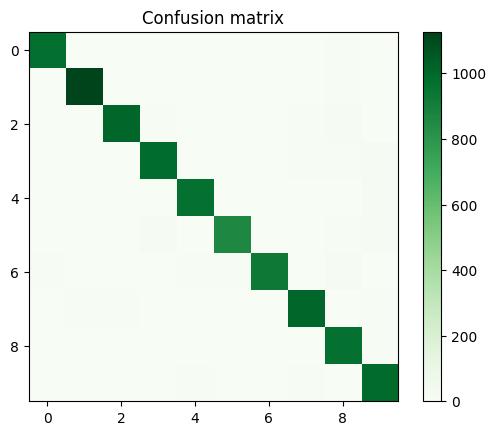

In [73]:
class_names = [str(i) for i in range(10)]
plot_confusion_matrix(cm, classes=class_names)

# Misclassified example (OVERFITTING)

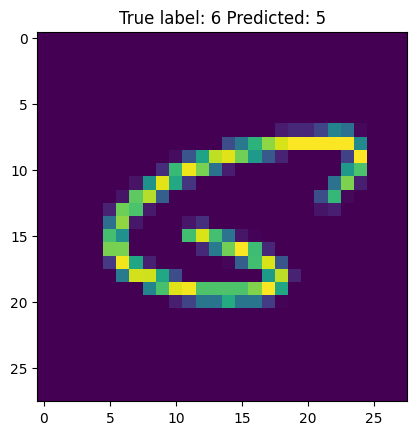

In [74]:
misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i])
plt.title("True label: %s Predicted: %s" % (y_test[i], y_pred[i]));